 #                      FOOD  FOOOD FOOOOD FOOOOOD :) :P

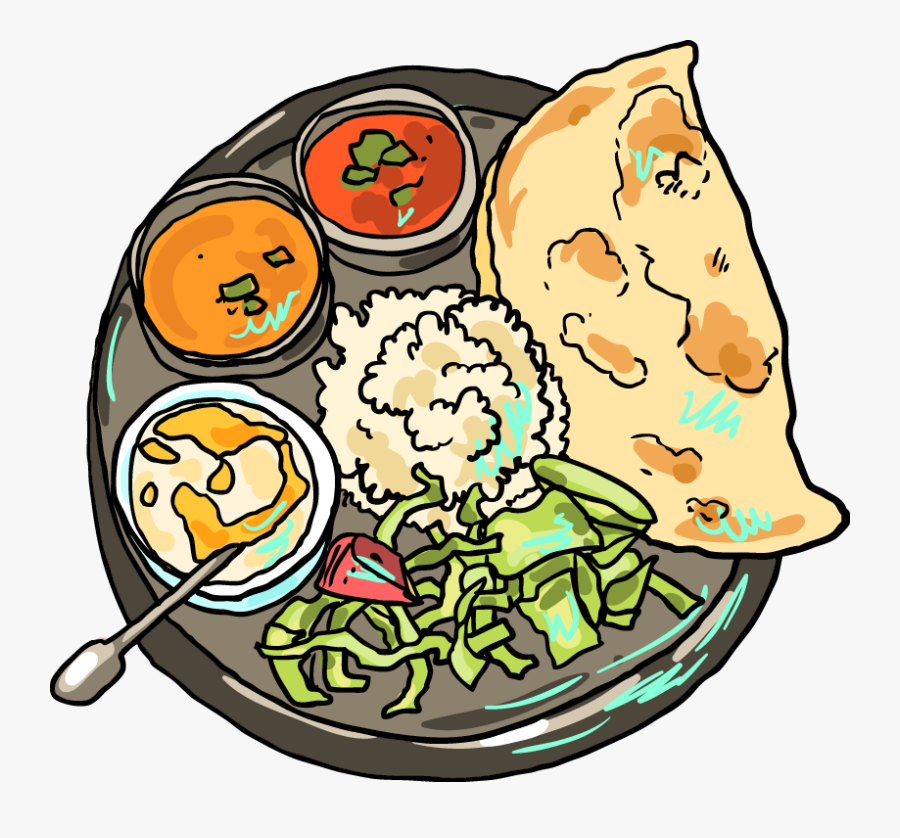

# Table of Contents:
1. [Introduction!!](#intro)
2. [Data Cleaning and preprocessing](#DCDP)
3. [Analysis](#ANA)
   1. [Regional Analysis](#RA) 
   2.    [States and its contribution :)](#States)
   3.  [Cooking time vs Prep time](#Cook) 
   4.  [Regional Distribution of cooking time](#RDC)
   5.   [Regional Distribution of prep time](#RDP) 
   6.   [Top dishes with least prep time](#PREP) 
   7.    [Cook dishes with least time](#dishes)
4. [Common Ingredients](#CI)
   1. [Dessert](#dessert)
   2. [Main course](#MC)
   3.  [Snacks](#Snacks)
   4.  [Starter](#st) 
   5.  [Veg](#Veg)
   6.  [NON-VEG](#NV)
5. [Thankyou](#Thankyou) 

<a id="intro"></a>
# Introduction:

Biriyani,Chole Bhature, Dosa, Vadapav, Littie choka, Kulche and many more
Honestly my mouth is downpowring :).
The traditional food of India has been widely appreciated for its fabulous use of herbs and spices. Indian cuisine is known for its large assortment of dishes. The cooking style varies from region to region and is largely divided into South Indian & North Indian cuisine. India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity.

This is my second notebook, I am open to suggestions and please upvote if you like what you see:).

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
Indian_food_df=pd.read_csv('../input/indian-food-101/indian_food.csv')

In [ ]:
Indian_food_df.diet.value_counts()

<a id="DCDP"></a>
# Data Cleaning and Preprocessing

In [ ]:
Indian_food_df.isnull().sum()
Indian_food_df=Indian_food_df.dropna()
Indian_food_df.isnull().sum()


In [ ]:
Indian_food_df.describe()

In [ ]:
Min_prep_time=Indian_food_df.prep_time.quantile(0.25)
Min_cook_time=Indian_food_df.cook_time.quantile(0.25)


In [ ]:
Cleaned_Indian_food=Indian_food_df[(Indian_food_df.prep_time>Min_prep_time) & (Indian_food_df.cook_time> Min_cook_time)]

In [ ]:
Cleaned_Indian_food.course.value_counts()

In [ ]:
Cleaned_Indian_food=Cleaned_Indian_food[Cleaned_Indian_food.flavor_profile != '-1']
Cleaned_Indian_food=Cleaned_Indian_food[Cleaned_Indian_food.region!='-1']
Cleaned_Indian_food=Cleaned_Indian_food[Cleaned_Indian_food.state!='-1']


In [ ]:
Cleaned_Indian_food.course.value_counts()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS 

<a id="ANA"></a>
# Analysis:

In [ ]:
Veg=Cleaned_Indian_food.diet.value_counts()[0]/Cleaned_Indian_food.diet.value_counts().sum()*100
NVeg=Cleaned_Indian_food.diet.value_counts()[1]/Cleaned_Indian_food.diet.value_counts().sum()*100
plt.figure(figsize=(15,6))
diet=[Veg,NVeg]
dietlabel=['Veg','Non Veg']
plt.pie(diet,labels=dietlabel,shadow=True,autopct='%1.0f%%');

More than Majority of food or cusines are Vegetarian Vegetarian Food being 91% while Non Vegetarain only 9%.

<a id=RA></a>
# Regional Analysis.

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Diet based on region')
sns.countplot(Cleaned_Indian_food.diet,data=Cleaned_Indian_food,order=Cleaned_Indian_food.diet.value_counts().index,hue=Cleaned_Indian_food.region,palette='Set1').legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);
plt.xticks(rotation=90);

Vegetarian Food dominates almost all regions when compared to Non-Veg food. Majority of veg contributions come from Western Regions of India that include states like Rajasthan, Gujrat while Northeast contributing the lest for vegetarian.
If we look at Non-Vegetarian Graphs the western Region contributes nil to non-vegetarian, while northeast being the highest contributor to Non-vegetarian food.

In [ ]:
Groups=Cleaned_Indian_food.groupby('region')
East=Groups.get_group('East')
West=Groups.get_group('West')
Central=Groups.get_group('Central')
North=Groups.get_group('North')
South=Groups.get_group('South')

In [ ]:
sns.set_style('dark')
fig,ax=plt.subplots(1,5, figsize=(25,25));
plt.title('Flavors distribution across different regions')
plt.tight_layout(pad=2)
EFlavorS=East.flavor_profile.value_counts()[0]/East.flavor_profile.value_counts().sum()*100
EFlavor=East.flavor_profile.value_counts()[1]/East.flavor_profile.value_counts().sum()*100
flavors=[EFlavorS,EFlavor]
lab=['Sweet','Spicy']
ax[0].set_title('Flavors of East')
ax[0].pie(flavors,labels=lab,autopct='%1.0f%%',colors=['cyan','gray'],shadow=True, startangle=90);
West.flavor_profile.value_counts()
Wspicy=West.flavor_profile.value_counts()[0]/West.flavor_profile.value_counts().sum()*100
Wsweet=West.flavor_profile.value_counts()[1]/West.flavor_profile.value_counts().sum()*100
Wbitter=West.flavor_profile.value_counts()[2]/West.flavor_profile.value_counts().sum()*100
Wlab=['Spicy','Sweet','bitter']
wflavors=[Wspicy,Wsweet,Wbitter]
ax[1].set_title('Flavors of West')
ax[1].pie(wflavors,labels=Wlab,shadow=True,startangle=90,autopct='%1.0f%%');
Nspicy=North.flavor_profile.value_counts()[0]
Nbitter=North.flavor_profile.value_counts()[1]
Nsweet=North.flavor_profile.value_counts()[2]
ax[2].set_title('Falvors of North')
Nflavors=[Nspicy,Nbitter,Nsweet]
Nlabel=['Spicy','Sweet','bitter']
ax[2].pie(Nflavors,labels=Nlabel,autopct='%1.0f%%',shadow=True,colors=['yellow','gray','green'],startangle=90);
Sspicy=South.flavor_profile.value_counts()[0]/South.flavor_profile.value_counts().sum()*100
Ssweet=South.flavor_profile.value_counts()[1]/South.flavor_profile.value_counts().sum()*100
ax[3].set_title('Flavors of South')
Sflavors=[Sspicy,Ssweet]
slabel=['Spicy','Sweet']
ax[3].pie(Sflavors,labels=slabel,shadow=True,autopct='%1.0f%%',colors=['red','gray'],startangle=90);
ax[4].set_title('Flavors of Central India')
Csweet=Central.flavor_profile.value_counts()[0]/Central.flavor_profile.value_counts().sum()*100
Cflavors=[Csweet]
Clabels=['Sweet']
ax[4].pie(Cflavors,labels=Clabels,shadow=True,autopct='%1.0f%%');


Every region is unique in its taste.

<a id=States></a>
# States and its contribution :)

In [ ]:
fig=px.bar(Cleaned_Indian_food,'state','course', color="course",title='state distribution and its courses');
fig.show();

West Bengal and Punjab are the chart-toppers in different aspects.
West Bengal is the highest contributor to desserts.
While Punjab the highest contributor of the main course.
Look up the regional analysis chart on falvors it will make sense. Majority of the dishes coming from the north will be spicy in nature.

<a id = 'Cook'></a>
# Cooking time vs Prep time

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(Cleaned_Indian_food.prep_time,Cleaned_Indian_food.cook_time,s=200,hue=Cleaned_Indian_food.course,palette='Dark2').set_title('Cooking time Vs Prepration time');

The cooking time for some main course dishes are quite high
While the Prep time for some dishes are extreme.
Most of the Main couse and dessert items have less prep time and moderate cooking time.

<a id="RDC"></a>
# Regional distribution of PREP time

In [ ]:
sns.set_style('dark')
fig,axes=plt.subplots(1,5, figsize=(19,10));
plt.tight_layout(pad=2)
sns.barplot(East.course,East.prep_time,ax=axes[0],palette='Set2').set_title('East');
sns.barplot(West.course,West.prep_time,ax=axes[1],palette='Set2').set_title('West');
sns.barplot(Central.course,Central.prep_time,ax=axes[2],palette='Set2').set_title('Central');
sns.barplot(North.course,North.prep_time,ax=axes[3],palette='Set2').set_title('North');
sns.barplot(South.course,South.prep_time,ax=axes[4],palette='Set2').set_title('South');
plt.suptitle('Regional Prep time');

<a id =RDP></a>
# Regional Distribution and Cook time.

In [ ]:
fig,axes=plt.subplots(1,5, figsize=(17,6));
plt.tight_layout(pad=1.2)
plt.suptitle('Cooking analysis regional analysis');
sns.barplot(East.course,East.cook_time,palette='winter',ax=axes[0]).set_title('East');
sns.barplot(West.course,West.cook_time,ax=axes[1],palette='Set2').set_title('West');
axes[0].set_title('central');
sns.barplot(Central.course,Central.cook_time,ax=axes[2],palette='Set2')
sns.barplot(North.course,North.cook_time,ax=axes[3],palette='Set2').set_title('North');
sns.barplot(South.course,South.cook_time,ax=axes[4],palette='Set2').set_title('South');


<a id ='PREP'></a>
# Ten quick prep dishes

In [ ]:
Sorted_prep_time=Cleaned_Indian_food.sort_values('prep_time',ascending=True)
plt.figure(figsize=(15,6))
sns.barplot(Sorted_prep_time.name.head(10),Sorted_prep_time.prep_time.head(10),palette='cividis',hue=Sorted_prep_time.course).legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);
plt.xticks(rotation=90);

<a id='dishes'></a>
# 10 dishes with least Cook time. 

In [ ]:
sorted_cooking_time=Cleaned_Indian_food.sort_values('cook_time',ascending=True)
plt.figure(figsize=(15,6))
sns.barplot(sorted_cooking_time.cook_time.head(10),sorted_cooking_time.name.head(10),hue=sorted_cooking_time.course).legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

This is an intresting mix of charts. we can assure that Starters have a longer prep time and cooking time compared to other course items.

<a id='CI'></a>
# Common Ingredients

<a id='dessert'></a>
# Dessert :P

In [ ]:
Ingredient=Cleaned_Indian_food[Cleaned_Indian_food.course=='dessert']
Ingredient_dessert=Ingredient.ingredients.tolist()
DI=[]
for i in range(0,len(Ingredient_dessert)):
    text=Ingredient_dessert[i].split(",")
    text=','.join(text)
    DI.append(text)
    text=','.join(DI)
Wc=WordCloud(width=400,height=400,background_color='white',min_font_size=10).generate(text)
plt.figure(figsize = (9, 6), facecolor = None) 
plt.imshow(Wc) 
plt.axis("off") 
plt.title('Common Ingredients of dessert')  
plt.show() 

<a id='MC'></a>
# Main Course

In [ ]:
Ingredient=Cleaned_Indian_food[Cleaned_Indian_food.course=='main course']
Main_course_ingredient=Ingredient.ingredients.to_list()
MC=[]
for i in range(0,len(Main_course_ingredient)):
    text=Main_course_ingredient[i].split(',')
    text=",".join(text)
    MC.append(text)
    text=",".join(MC)
Wc=WordCloud(width=400,height=400,background_color='white',min_font_size=10,colormap='mako').generate(text)
plt.figure(figsize = (6,6), facecolor = None) 
plt.imshow(Wc) 
plt.axis("off") 
plt.title('Common Ingredients of main course')  
plt.show()


<a id='Snacks'></a>
# Snacks

In [ ]:
Ingredients=Cleaned_Indian_food[Cleaned_Indian_food.course=='snack']
Snack=Ingredients.ingredients.tolist()
S=[]
for i in range(0,len(Snack)):
    text=Snack[i].split(',')
    text=",".join(text)
    S.append(text)
    text=",".join(S)
Wc=WordCloud(width=400,height=400,background_color='white',min_font_size=10,colormap='mako').generate(text)
plt.figure(figsize = (6, 8), facecolor = None) 
plt.imshow(Wc) 
plt.axis("off") 
plt.title('Snack')  
plt.show()



<a id='st'></a>
# Starter

In [ ]:
Stater=Cleaned_Indian_food[Cleaned_Indian_food.course=='starter']
Start=Stater.ingredients.tolist()
st=[]
for i in range(0,len(Start)):
    text=Start[i].split(",")
    text=",".join(text)
    st.append(text)
    text=",".join(st)
Wc=WordCloud(width=400,height=400,background_color='white',min_font_size=10,colormap='mako').generate(text)
plt.figure(figsize = (6, 8), facecolor = None) 
plt.imshow(Wc) 
plt.axis("off") 
plt.title('Starters')  
plt.show()

<a id='#Veg'></a>
# Veg

In [ ]:
Veg=Cleaned_Indian_food[Cleaned_Indian_food.diet=='vegetarian']
Veg_ingredients=Veg.ingredients.tolist()
V=[]
for i in range(0,len(Veg)):
    text1=Veg_ingredients[i].split(",")
    text1=",".join(text1)
    V.append(text1)
    text1=",".join(V)
Wc=WordCloud(width=400,height=400,background_color='white',min_font_size=10,colormap='Greens').generate(text1)
plt.figure(figsize = (6,6), facecolor = 'green') 
plt.imshow(Wc) 
plt.axis("off") 
plt.title('Common Ingredients of Vegeterain Meals.')  
plt.show()

<a id='NV'></a>
# Non-VEG

In [ ]:
NVeg=Cleaned_Indian_food[Cleaned_Indian_food.diet=='non vegetarian']
NVeg_ingredients=NVeg.ingredients.tolist()
NV=[]
for i in range(0,len(NVeg_ingredients)):
    text=NVeg_ingredients[i].split(",")
    text=",".join(text)
    NV.append(text)
    text=",".join(NV)
Wc=WordCloud(width=400,height=400,background_color='white',min_font_size=10,colormap='inferno').generate(text)
plt.figure(figsize = (6,6), facecolor = 'red') 
plt.imshow(Wc) 
plt.axis("off") 
plt.title('Common Ingredients of  Non Vegeterain Meals.')  
plt.show()


<a if='Thankyou'></a>
# Thankyou 
Thank you for reading or going thought the notebook.
please, upvote this is my second notebook and seeing those upvote will give a push.
I am open to suggestions and feedback if you can share that would be wonderful.
Thank you!! 